# Simulating light curves from microlensing events

# Task 1

Variation of microlensing light curves for different values of $u_0$. 

In [4]:
#import packages, set formatting
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#define equations
def get_u(u0, t): #we don't need t0 and tE because t is already normalzied
    u_t = np.sqrt(u0**2 + t**2)
    return u_t
    
def get_mu(u0, t):
    mu = (get_u(u0, t)**2 + 2)/(get_u(u0, t) * np.sqrt(get_u(u0, t)**2 + 4))
    return mu

In [6]:
#define data
t = np.arange(-2, 2, 0.01)
mu_1 = get_mu(0.1, t)
mu_2 = get_mu(0.3, t)

Text(0.5, 0, 'Normalzied time, $\\left(\\dfrac{t-t_0}{t_E}\\right)$')

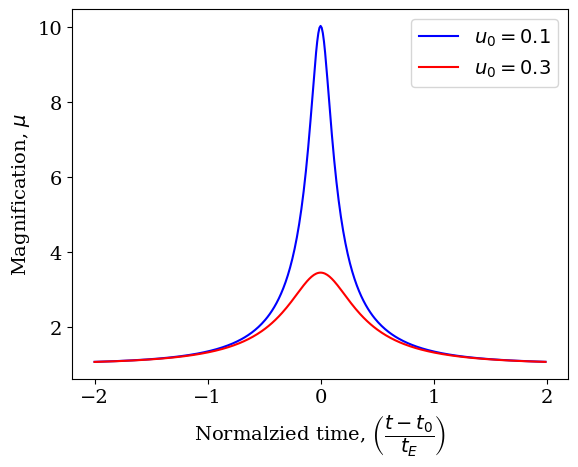

In [17]:
plt.plot(t, mu_1, label = r'$u_0 = 0.1$', color='blue')
plt.plot(t, mu_2, label = r'$u_0 = 0.3$', color='red')
plt.legend()
plt.ylabel(r'Magnification, $\mu$')
plt.xlabel(r'Normalzied time, $\left(\dfrac{t-t_0}{t_E}\right)$')

# Task 2

Comparing observed data to modelled microlensing light curve.

In [13]:
#define the equations

# Source distance from the lens
def u(t,u0):
    return np.sqrt(u0*u0+t*t)

# Total amplification (magnification)
def amp(t,u0):
    return (u(t,u0)*u(t,u0)+2.0)/(u(t,u0)*np.sqrt(u(t,u0)*u(t,u0)+4.0))

# I-band magnitude
def mi(a,ibl,fbl):
    return ibl-2.5*np.log10(fbl*a+1.0-fbl)

In [14]:
#define the data

# Input parameters
t0=2452863.072
u0=0.059
te=59.426
ibl=16.046
fbl=0.361

# Read the observed light curve
to,mo=np.loadtxt('phot.dat.txt',unpack=True,usecols=[0,1])

# Use MJD instead of JD
t0=t0-2450000.0
to=to-2450000.0

# Calculate the total amplification
tc=np.arange(2680.0,3040.0,0.1)
ac=[amp((t-t0)/te,u0) for t in tc]
mc=[mi(a,ibl,fbl) for a in ac]

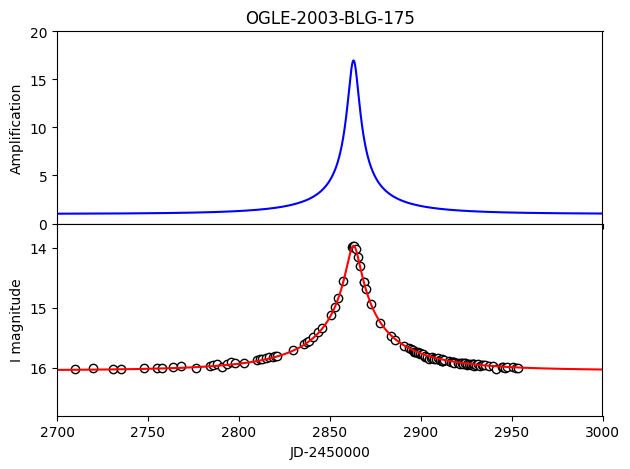

In [17]:
# Plot the amplification light curve
ax=plt.subplot(211)
plt.plot(tc,ac,'b-',linewidth=1.5)
plt.ylim(0.0,20.0)
plt.setp(ax.get_xticklabels(),visible=False)
plt.ylabel('Amplification')
plt.title('OGLE-2003-BLG-175')

# Plot the magnitude light curve
plt.subplot(212,sharex=ax)
plt.plot(to,mo,'ko',mfc='w')
plt.plot(tc,mc,'r-',linewidth=1.5)
plt.xlim(2700.0,3000.0)
plt.ylim(16.8,13.6)
plt.xlabel('JD-2450000')
plt.ylabel('I magnitude')

# Adjust the vertical spacing and save the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
plt.savefig('OGLE-2003-BLG-175.jpg',dpi=300,bbox_inches='tight')
plt.show()